In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

    YearsExperience  Salary
0               0.3    36.2
1               0.6    36.6
2               0.8    42.8
3               1.1    39.3
4               1.3    46.2
5               1.5    37.7
6               2.0    43.5
7               2.2    39.8
8               2.9    56.6
9               3.0    60.1
10              3.2    54.4
11              3.2    64.4
12              3.7    57.1
13              3.9    63.2
14              4.0    55.7
15              4.0    56.9
16              4.1    57.0
17              4.5    61.1
18              4.9    67.9
19              5.1    66.0
20              5.3    83.0
21              5.9    81.3
22              6.0    93.9
23              6.8    91.7
24              7.1    98.2
25              7.9   101.3
26              8.2   113.8
27              8.7   109.4
28              9.0   105.5
29              9.5   116.9
30              9.6   112.6
31             10.3   122.3
32             10.5   121.8


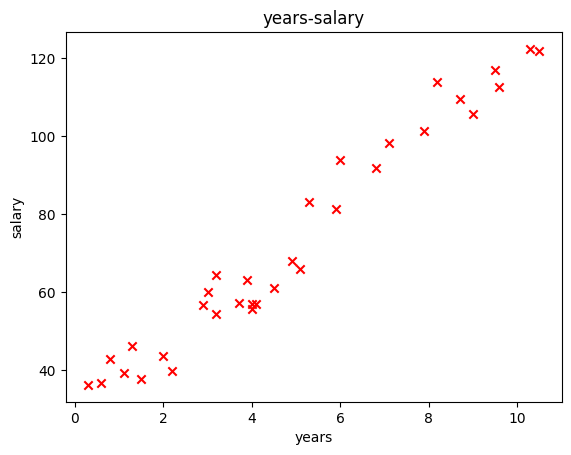

In [5]:
data_url="https://raw.githubusercontent.com/GrandmaCan/ML/main/Resgression/Salary_Data.csv" #取得data
data=pd.read_csv(data_url)
print(data)
x_axis=data["YearsExperience"]
y_axis=data["Salary"]
def plt_graph(w,b):

  plt.scatter(x_axis,y_axis,marker="x",c="red") #繪製散佈圖
  plt.title("years-salary")
  plt.xlabel("years")
  plt.ylabel("salary")
  #==================
#plt_graph(0,0)

In [4]:
def calculate_cost(x_axis,y_axis,w,b):
    y_pred=x_axis*w+b #pandas做運算output會自動Map到每一項，出來也是一個matrix
    cost=(y_axis-y_pred)**2 #cost已經是matrix
    return cost.sum()/len(x_axis)  #

In [ ]:
def calculate_gradient(x,y,w,b):
  w_grad=(-2*x*(y-w*x-b)).sum()/len(x)  #w方向的斜率
  b_grad=(-2*(y-w*x-b)).sum()/len(x)  #b方向的斜率
  return w_grad,b_grad

In [ ]:
cost=np.zeros((201,201))
i=0
for w in range(-100,101):
  j=0
  for b in range(-100,101):
    cost[i][j]=calculate_cost(x_axis,y_axis,w,b)
    j+=1
  i+=1

In [ ]:

def gradient_desent(w,b,learning_rate):
  w_grad,b_grad=calculate_gradient(x_axis,y_axis,w,b)
  w=(w-w_grad*learning_rate)
  b=b-b_grad*learning_rate
  return w,b

In [ ]:
w=-50
b=0
learning_rate=0.001
count=15001
w_list=[]
b_list=[]
desent_cost_list=[]
count_list=list(filter(lambda x:x%1000==0,range(count)))
for i in range(count):
  w,b=gradient_desent(w,b,learning_rate)
  
  if(i%1000==0):
    print(f"w={w:.2f},b={b:.2f},cost={calculate_cost(x_axis,y_axis,w,b):.2f},count={i}")
    w_list.append(w)
    b_list.append(b)
    desent_cost_list.append(calculate_cost(x_axis,y_axis,w,b))

plt.plot(count_list,desent_cost_list)
plt.xlabel("count")
plt.ylabel("cost")
plt.show()

ax=plt.axes(projection="3d")  #構建3d圖
ax.set_title("w-b-cost")
ax.set_xlabel("w")
ax.set_ylabel("b")
ax.set_zlabel("cost")
ax.xaxis.set_pane_color("white")
ax.yaxis.set_pane_color("white")
ax.zaxis.set_pane_color("white")
ws=np.arange(-100,101)
bs=np.arange(-100,101)
b_grid,w_grid=np.meshgrid(bs,ws)  #meshgrid 構築位置矩陣
ax.plot_surface(w_grid,b_grid,cost,alpha=0.5)
ax.plot(w_list,b_list,desent_cost_list,color="red")
